# Logistic Regression for Cancer Detection
This project focuses on analyzing the Breast Cancer Dataset, which contains features computed from digitized images of fine needle aspirates of breast masses. The primary objective is to develop a predictive model to accurately classify breast cancer tumors as either malignant or benign. Through extensive data exploration, preprocessing, and model evaluation, this project aims to contribute valuable insights into breast cancer diagnosis using machine learning techniques.

## 1. **Data Exploration and Visualization**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

In [2]:
cancer_df = pd.read_csv("Cancer.csv")
#print(cancer_df)
print(cancer_df.shape)

(569, 33)


In [3]:
def display_missing_perc(cancer_df):    
    """
    This is a function that evaluates the percentage of NA values per column
    """
    for col in cancer_df.columns.tolist():          
        print(f'{col} column missing values: {100*(cancer_df[col].isnull().sum()/len(cancer_df[col]))}')
    print('\n')
display_missing_perc(cancer_df)

id column missing values: 0.0
diagnosis column missing values: 0.0
radius_mean column missing values: 0.0
texture_mean column missing values: 0.0
perimeter_mean column missing values: 0.0
area_mean column missing values: 0.0
 column missing values: 0.0
compactness_mean column missing values: 0.0
concavity_mean column missing values: 0.0
concave points_mean column missing values: 0.0
symmetry_mean column missing values: 0.0
fractal_dimension_mean column missing values: 0.0
radius_se column missing values: 0.0
texture_se column missing values: 0.0
perimeter_se column missing values: 0.0
area_se column missing values: 0.0
smoothness_se column missing values: 0.0
compactness_se column missing values: 0.0
concavity_se column missing values: 0.0
concave points_se column missing values: 0.0
symmetry_se column missing values: 0.0
fractal_dimension_se column missing values: 0.0
radius_worst column missing values: 0.0
texture_worst column missing values: 0.0
perimeter_worst column missing values

#### Performing EDA:

In [4]:
#remove unnamed column and Id column
cancer_df = cancer_df.loc[:, ~cancer_df.columns.str.contains('^Unnamed')]
cancer_df = cancer_df.loc[:, ~cancer_df.columns.str.contains('^id')]
#get the type of each column
cancer_df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [5]:
#overview of each column
descriptive_stats = cancer_df.describe()

# Display the descriptive statistics
print(descriptive_stats)

       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [6]:
# Frequency count for the 'diagnosis' column
frequency_counts = cancer_df['diagnosis'].value_counts()

# Display frequency counts
print(frequency_counts)

B    357
M    212
Name: diagnosis, dtype: int64


### Creating plots to see different distributions

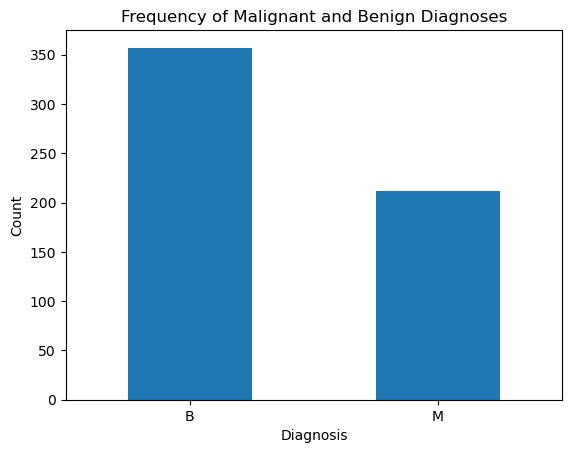

In [7]:
# Frequency counts of the 'diagnosis' column
diagnosis_counts = cancer_df['diagnosis'].value_counts()

# Create a bar plot
diagnosis_counts.plot(kind='bar')
plt.title('Frequency of Malignant and Benign Diagnoses')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotates X-axis labels to horizontal
plt.show()


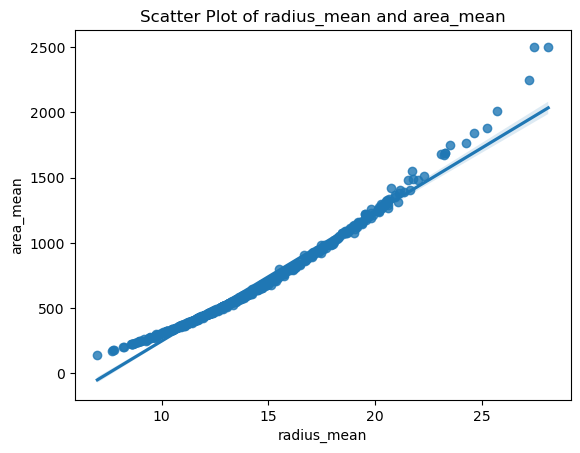

In [8]:
scatter, ax = plt.subplots()
sns.regplot(data=cancer_df, x = 'radius_mean', y = 'area_mean',ax=ax)
ax.set_title('Scatter Plot of radius_mean and area_mean')
ax.set_xlabel('radius_mean')
ax.set_ylabel('area_mean')
plt.show()

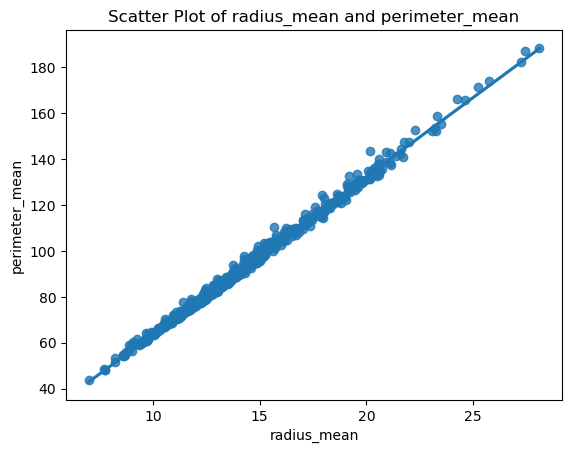

In [9]:
scatter, ax = plt.subplots()
sns.regplot(data=cancer_df, x = 'radius_mean', y = 'perimeter_mean',ax=ax)
ax.set_title('Scatter Plot of radius_mean and perimeter_mean')
ax.set_xlabel('radius_mean')
ax.set_ylabel('perimeter_mean')
plt.show()

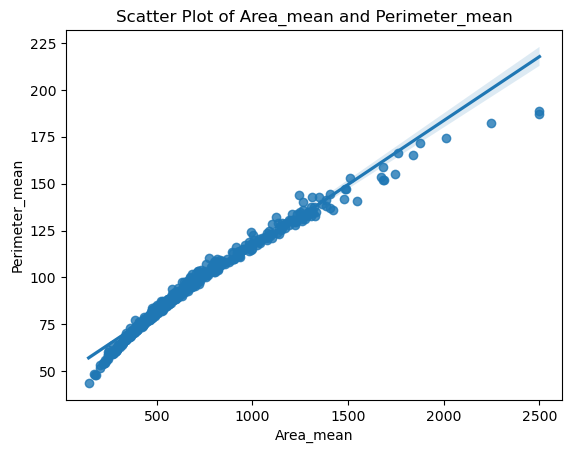

In [10]:
scatter, ax = plt.subplots()
sns.regplot(data=cancer_df, x = 'area_mean', y = 'perimeter_mean',ax=ax)
ax.set_title('Scatter Plot of Area_mean and Perimeter_mean')
ax.set_xlabel('Area_mean')
ax.set_ylabel('Perimeter_mean')
plt.show()

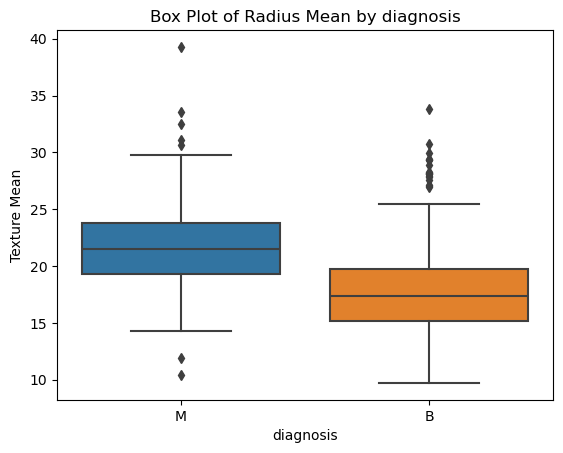

In [11]:
box, ax = plt.subplots()
sns.boxplot(data=cancer_df, x='diagnosis', y='texture_mean', ax=ax)
ax.set_title('Box Plot of Radius Mean by diagnosis')
ax.set_xlabel('diagnosis')
ax.set_ylabel('Texture Mean')
plt.show()

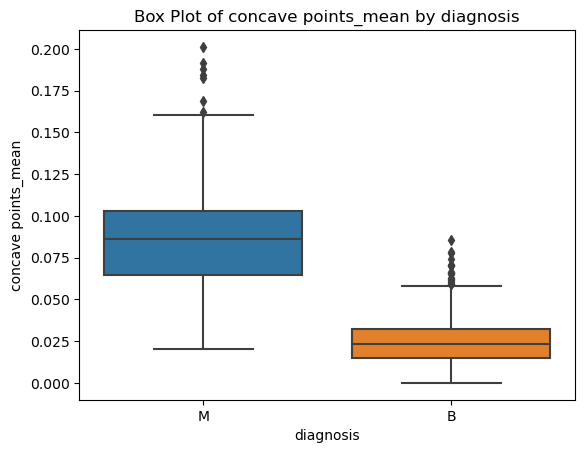

In [12]:
box, ax = plt.subplots()
sns.boxplot(data=cancer_df, x='diagnosis', y='concave points_mean', ax=ax)
ax.set_title('Box Plot of concave points_mean by diagnosis')
ax.set_xlabel('diagnosis')
ax.set_ylabel('concave points_mean')
plt.show()

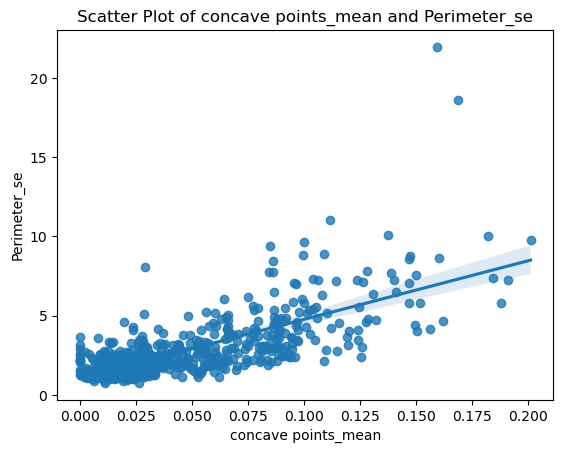

In [13]:
scatter, ax = plt.subplots()
sns.regplot(data=cancer_df, x = 'concave points_mean', y = 'perimeter_se',ax=ax)
ax.set_title('Scatter Plot of concave points_mean and Perimeter_se')
ax.set_xlabel('concave points_mean')
ax.set_ylabel('Perimeter_se')
plt.show()

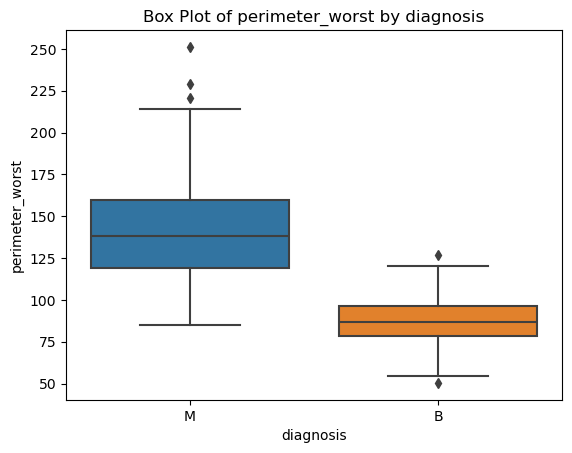

In [14]:
box, ax = plt.subplots()
sns.boxplot(data=cancer_df, x='diagnosis', y='perimeter_worst', ax=ax)
ax.set_title('Box Plot of perimeter_worst by diagnosis')
ax.set_xlabel('diagnosis')
ax.set_ylabel('perimeter_worst')
plt.show()

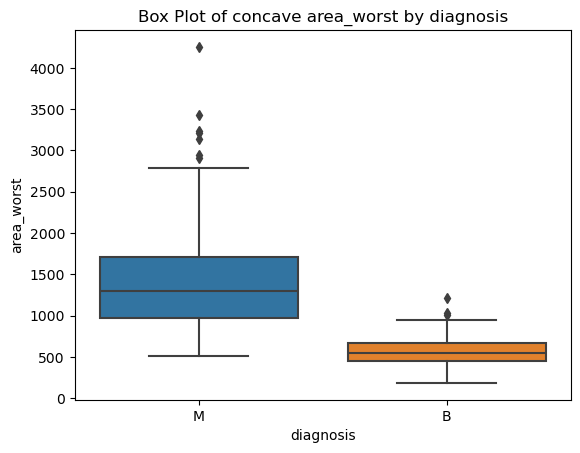

In [15]:
box, ax = plt.subplots()
sns.boxplot(data=cancer_df, x='diagnosis', y='area_worst', ax=ax)
ax.set_title('Box Plot of concave area_worst by diagnosis')
ax.set_xlabel('diagnosis')
ax.set_ylabel('area_worst')
plt.show()

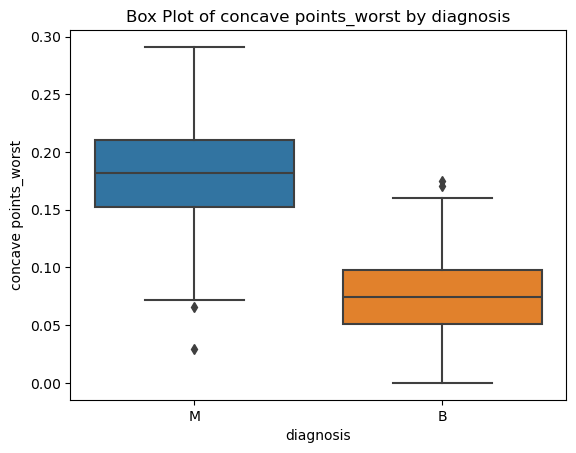

In [16]:
box, ax = plt.subplots()
sns.boxplot(data=cancer_df, x='diagnosis', y='concave points_worst', ax=ax)
ax.set_title('Box Plot of concave points_worst by diagnosis')
ax.set_xlabel('diagnosis')
ax.set_ylabel('concave points_worst')
plt.show()

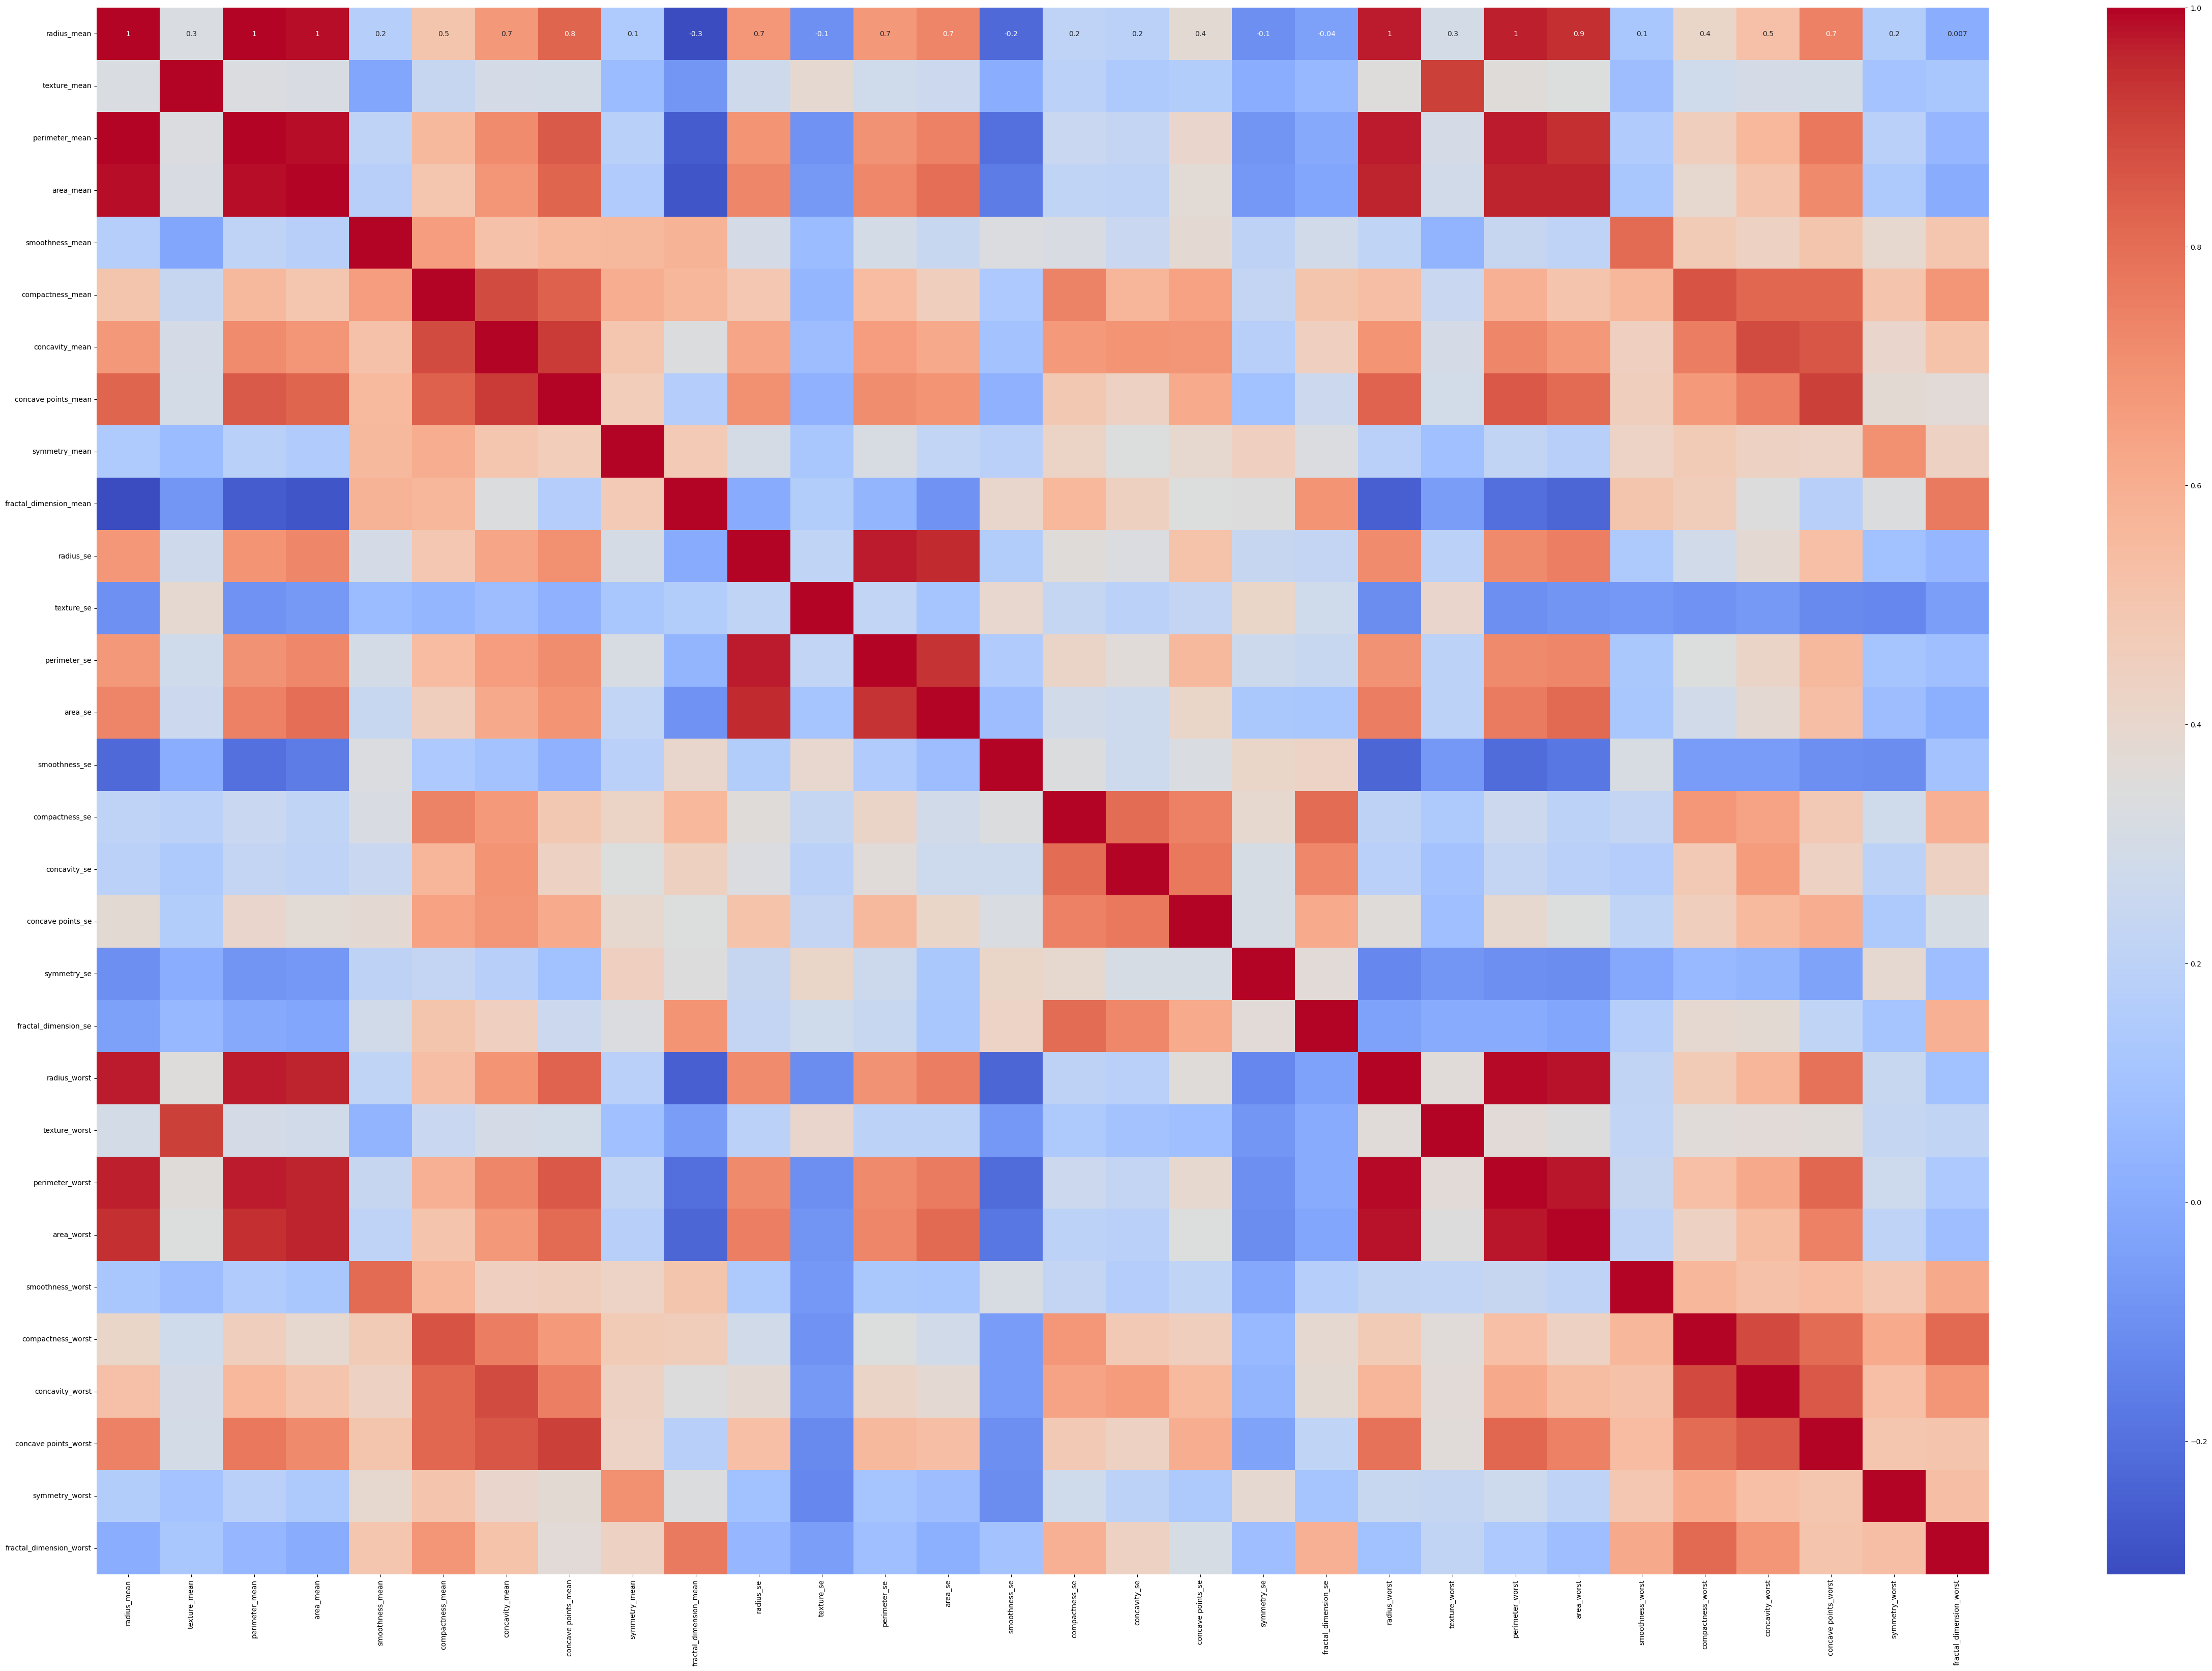

In [17]:
# I select only the numeric columns
# In these two first lines, I get all the numeric columns and make them into a list.
numeric_cols = cancer_df.select_dtypes(include=[np.number])
col_list = []
cor = numeric_cols.corr()
plt.figure(figsize=(60,40))
sns.heatmap(data=cor,annot=True,cmap='coolwarm',fmt='.1g')
plt.show()

In [18]:
#Since the heatmap is way too much, this is a function to roll out the pearson's correlation test.
# Preprocessing in order for the function to work I transformed "diagnosis" into a numerical variable

# Creating  a dummy variable for 'diagnosis'
cancer_df['diagnosis'] = cancer_df['diagnosis'].map({'M': 1, 'B': 0})

for col in numeric_cols:
    """
    This function runs every numerical column through pearson's correlation test
    """
    if col != 'diagnosis': 
        x, y = col, "diagnosis" 
        
        dtf_noNan = cancer_df[cancer_df[x].notnull()]
        
        if x in dtf_noNan.columns and y in dtf_noNan.columns:
            coeff, p = scipy.stats.pearsonr(dtf_noNan[x], dtf_noNan[y])
            coeff, p = round(coeff, 3), round(p, 3)
            
            if coeff > 0:
                conclusion = "Positive correlation"
            elif coeff < 0:
                conclusion = "Negative correlation"
            else:
                conclusion = "No correlation"
            
            if p < 0.05:
                print("Pearson Correlation:", col, coeff, conclusion, "(p-value: "+str(p)+")")
                col_list.append(col)


Pearson Correlation: radius_mean 0.73 Positive correlation (p-value: 0.0)
Pearson Correlation: texture_mean 0.415 Positive correlation (p-value: 0.0)
Pearson Correlation: perimeter_mean 0.743 Positive correlation (p-value: 0.0)
Pearson Correlation: area_mean 0.709 Positive correlation (p-value: 0.0)
Pearson Correlation: smoothness_mean 0.359 Positive correlation (p-value: 0.0)
Pearson Correlation: compactness_mean 0.597 Positive correlation (p-value: 0.0)
Pearson Correlation: concavity_mean 0.696 Positive correlation (p-value: 0.0)
Pearson Correlation: concave points_mean 0.777 Positive correlation (p-value: 0.0)
Pearson Correlation: symmetry_mean 0.33 Positive correlation (p-value: 0.0)
Pearson Correlation: radius_se 0.567 Positive correlation (p-value: 0.0)
Pearson Correlation: perimeter_se 0.556 Positive correlation (p-value: 0.0)
Pearson Correlation: area_se 0.548 Positive correlation (p-value: 0.0)
Pearson Correlation: compactness_se 0.293 Positive correlation (p-value: 0.0)
Pears

In [19]:
highly_correlated_features = set()
for i in range(len(cor.columns)):
    """
    This is a function that shows which of the columns are highly correlated
    """
    for j in range(i):
        if abs(cor.iloc[i, j]) > 0.99:  
            colname_i = cor.columns[i]
            colname_j = cor.columns[j]
            highly_correlated_features.add(colname_i)
            highly_correlated_features.add(colname_j)

# I convert the set of highly correlated features to a list
highly_correlated_features_list = list(highly_correlated_features)

# I print or inspect the highly correlated features
print(highly_correlated_features_list)

['radius_worst', 'radius_mean', 'perimeter_mean', 'perimeter_worst']


### Conclusions from EDA and steps forward

From the plot and from the covariance table, it seems like most of the columns are highly correlated. However, the columns radius_worst', 'radius_mean', 'perimeter_mean', 'perimeter_worst' exhibit the highest degree  of collinearity with all other variables. 

## 2. **Logistic Regression Model Development**

### short explanation about model development
Albeit multicollinearity is not a bad thing per se, 'radius_mean', 'perimeter_mean', 'perimeter_worst' exhibit the highest degree of collinearity with all other variables (above 0.9). Therefore, for the logistic regression, I have decided to drop them to make a model with less correlation. 

In [20]:
#develop a new model that has variables with less correlation: 
# Select features and target
X = cancer_df.drop(columns=['diagnosis', 'perimeter_worst', 'radius_mean','radius_worst',  'perimeter_mean'])
y = cancer_df['diagnosis']

In [21]:
# Add a constant to the feature matrix X for the intercept
X = sm.add_constant(X)

# Fit the model
model = sm.GLM(y, X, family=sm.families.Binomial()).fit()

# Print the summary of the model
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                            GLM   Df Residuals:                      542
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15.603
Date:                Thu, 25 Jan 2024   Deviance:                       31.207
Time:                        09:59:15   Pearson chi2:                     634.
No. Iterations:                    14   Pseudo R-squ. (CS):             0.7180
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -

## 3. **Model Evaluation** 

In [22]:
#To perform the evaluation of my model, I split the data set into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# I add a constant to the feature matrix X_train for the intercept for the training model
X_train = sm.add_constant(X_train)

# I add a constant to the feature matrix X_test for the intercept for the testing model
X_test = sm.add_constant(X_test)

# Fit the logistic regression model
model = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()

# Predict probabilities on the test set
pbenign = model.predict(X_test)

/Users/Gustavo/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


In [24]:
from sklearn.metrics import accuracy_score

# Convert predicted probabilities to binary predictions (0 or 1)
predictions = (pbenign > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(" The Accuracy of my model is :", accuracy)

 The Accuracy of my model is : 0.9035087719298246


In [25]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate mean squared error
mse = mean_squared_error(y_test, pbenign)

# Calculate RMSE
rmse = np.sqrt(mse)
print("The RMSE in my model is:", rmse)

The RMSE in my model is: 0.31063037209869776


In [26]:
from sklearn.metrics import r2_score

# Calculate R^2
r_squared = r2_score(y_test, pbenign)
print("The R^2 of my model is:", r_squared)

The R^2 of my model is: 0.5892564690468391


### Model Interpretation: 
- The accuracy in my model is: 0.9035087719298246. This means that my model correctly predicts the outcome of 90.35% of the time on my test data set. 
- The RMSE in my model is: 0.31063037209869776. This means that my model's prediction are, on average, 0.3106 units away from the actual value. 
- The R^2 of my model is: 0.5892564690468391. This means that 58.93% of the variance in my dependent variable is explained by the model. For Linear Regression, a higher R^2 is a better fit, however, since this is a Logistic Regression, the interpretation varies. 
Overall, I think this is a good model when it comes to its predictability. Since I am not trying to evaluate and improve the accuracy of every single predictor, but its predictive power, I consider this  to be a good model when it comes to prediction. 

## 4. **Testing Interactions Between Features**

In [27]:
# Does the diagnosis change the area_mean in relation to texture_mean?
results_area_mean = smf.ols(formula='area_mean ~ texture_mean+ diagnosis+texture_mean:diagnosis', data=cancer_df).fit()
results_area_mean.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              area_mean   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     193.8
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           2.09e-86
Time:                        09:59:15   Log-Likelihood:                -3941.8
No. Observations:                 569   AIC:                             7892.
Df Residuals:                     565   BIC:                             7909.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                486.3076     60.312      8.063      0.000     367.845     604.770
texture_mean              -1.3127      3.286     -0.399      0.690      -7.767       5.142
diagnosis                273.8978    115.885      2.364      0.018      46.279     501.516
texture_mean:diagnosis    11.4110      5.582      2.044      0.041       0.447      22.375
==============================================================================
Omnibus:                      196.390   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1207.511
Skew:                           1.382   Prob(JB):                    6.20e-263
Kurtosis:                       9.579   Cond. No.                         259.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation of this model: Does the diagnosis change the area_mean in relation to texture_mean?
If the diagnosis indicates that the cancer is benign, then when texture_mean increases by one point, the area_mean decreases by 1.3 points, holding all other variables constant. However, this is not statistically significant. The baseline is 273.8978
If the diagnosis indicates that the cancer is malign, then, the baseline is 273.8978+ 486.3076 = 760.2054. For each one-unit increase in texture_mean, the change in area_mean would be: (-1.3127) + (11.4110 * 1) = 10.0983. 

In [28]:
#Does the diagnosis influence the effect of symmetry_mean in relation to its compactness_mean?
results_symmetry_mean = smf.ols(formula='compactness_mean ~ symmetry_mean + diagnosis + symmetry_mean:diagnosis', data=cancer_df).fit()
results_symmetry_mean.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       compactness_mean   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     262.5
Date:                Thu, 25 Jan 2024   Prob (F-statistic):          1.18e-106
Time:                        09:59:15   Log-Likelihood:                 1114.9
No. Observations:                 569   AIC:                            -2222.
Df Residuals:                     565   BIC:                            -2204.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.0103      0.013     -0.801      0.423      -0.036       0.015
symmetry_mean               0.5189      0.073      7.097      0.000       0.375       0.663
diagnosis                  -0.1076      0.021     -5.119      0.000      -0.149      -0.066
symmetry_mean:diagnosis     0.8446      0.112      7.520      0.000       0.624       1.065
==============================================================================
Omnibus:                       53.576   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.812
Skew:                           0.698   Prob(JB):                     5.69e-17
Kurtosis:                       4.099   Cond. No.                         97.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation of the model: Does the diagnosis influence the effect of symmetry_mean in relation to its compactness_mean?
If the diagnosis is "benign": By each point increase of symmetry mean, its compactness mean increases by 0.5189.
If the diagnosis is "Malign": By each point increase of symmetry mean, its compactness mean changes by 1.3635 (i.e. 0.5189+0.8446). All of these are significant. 


In [29]:
#does the diagnosis influence the relationship between radius_mean and area_mean?
results_radius_mean = smf.ols(formula = 'radius_mean ~ area_mean + diagnosis + area_mean:diagnosis', data=cancer_df).fit()
results_radius_mean.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            radius_mean   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 2.384e+04
Date:                Thu, 25 Jan 2024   Prob (F-statistic):               0.00
Time:                        09:59:15   Log-Likelihood:                -144.14
No. Observations:                 569   AIC:                             296.3
Df Residuals:                     565   BIC:                             313.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.0445      0.059    101.606      0.000       5.928       6.161
area_mean               0.0132      0.000    106.791      0.000       0.013       0.013
diagnosis               2.9832      0.085     34.963      0.000       2.816       3.151
area_mean:diagnosis    -0.0046      0.000    -33.399      0.000      -0.005      -0.004
==============================================================================
Omnibus:                      486.437   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17486.287
Skew:                          -3.539   Prob(JB):                         0.00
Kurtosis:                      29.220   Cond. No.                     6.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpretation of model: does the diagnosis influence the relationship between radius_mean and area_mean?
If the diagnosis is benign: For every increase point in area_mean, its radius_mean increases by 0.0132, with a baseline of 6.0445. 
If the diagnosis is malign: the baseline changes from 6.0445 to 9.0277 (6.0445 + 2.9832), and for every increase point in area_mean, radius_mean increases by 0.0086 (0.0132 - 0.0046).


### issues that occur when using a linear regression model to predict binary outcomes.
Using linear regression to predict binary outcomes is problematic becaise it violates the OLS assumptions and can lead to inappropriate output interpretation. Specifically, linear regression can predict values outside the 0-1 range (which we say with the model "Does the diagnosis influence the effect of symmetry_mean in relation to its compactness_mean?". 

This conflicts with the binary nature of the outcomes.
Moreover, it assumes constant variance and a linear relationship between predictors and the outcome, which is often not the case in binary data, leading to inefficiencies and inaccuracies.

Finally, the normality assumption for residuals doesn't hold for binary outcomes, and standard model evaluation metrics like R² do not accurately reflect the explanatory power of the model.

## 5. **Feature Selection and Cross-Validation: Full vs. Reduced Model**

In [35]:
#I separate the data into train and testing:
from sklearn.model_selection import train_test_split
train,val=train_test_split(cancer_df, train_size=0.8)

In [36]:
# I prepare the data for the full model
X_full = train.drop('diagnosis', axis=1)
X_full = sm.add_constant(X_full)  # Add a constant (intercept) to the predictors
y_full = train['diagnosis']

# I fit the full OLS model
full_model = sm.OLS(y_full, X_full).fit()

# I calculate the R^2 value for the full model
r_squared_full = full_model.rsquared
print(r_squared_full)

0.7799783664743642


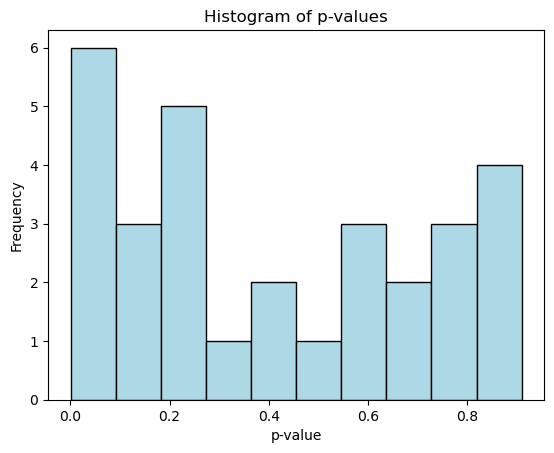

In [37]:
# I extract p-values from the model summary, excluding the intercept
p_values = full_model.pvalues[1:]

# I plot the histogram of p-values
plt.hist(p_values, color="lightblue", edgecolor="black")
plt.xlabel("p-value")
plt.ylabel("Frequency")
plt.title("Histogram of p-values")
plt.show()

In [38]:
def fdr_cut(pvals, q=0.1):
    """
    Determine the threshold p-value at a given FDR level and plot the p-values.

    Parameters:
        pvals (list or array): A list or array of p-values.
        q (float): The desired FDR level.

    Returns:
        float: The threshold p-value at the given FDR level.
    """
    # Sort p-values and remove NaNs
    pvals = sorted([p for p in pvals if not pd.isna(p)])
    N = len(pvals)
    k = np.arange(1, N + 1)
    alpha = max(p for p, rank in zip(pvals, k) if p <= q * rank / (N + 1))

    # Plot the p-values
    plt.figure(figsize=(8, 6))
    plt.scatter(k, pvals, c=['gray' if p > alpha else 'red' for p in pvals], s=5)
    plt.plot(k, q * k / (N + 1), color='blue', label=f'FDR {q}')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("Order")
    plt.ylabel("p-value")
    plt.title(f"FDR of {q}")
    plt.legend()
    plt.show()

    return alpha

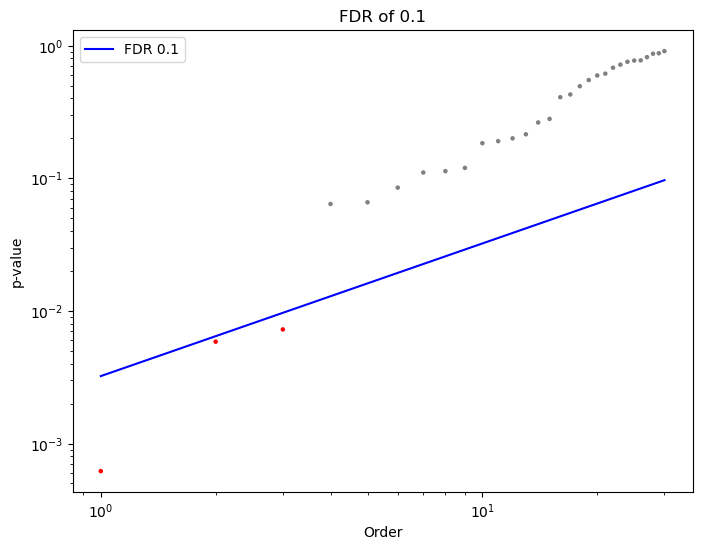

Threshold p-value at 10% FDR: 0.0073


In [39]:
# I apply the function on the extracted p-values
threshold = fdr_cut(p_values)
print(f"Threshold p-value at 10% FDR: {threshold:.4f}")

In [40]:
# I identify significant predictors based on the threshold p-value
significant_predictors_indices = np.where(p_values <= threshold)[0]
significant_predictors = [X_full.columns[i] for i in significant_predictors_indices]

In [41]:
# I prepare the data for the reduced model
X_reduced = X_full[significant_predictors]
y_reduced = y_full

# I fit the reduced OLS model using only significant predictors
reduced_model = sm.OLS(y_reduced, X_reduced).fit()
# I calculate the R^2 value for the reduced model
r_squared_reduced = reduced_model.rsquared

print(f"R^2 value for the new model: {r_squared_reduced:.4f}")

R^2 value for the new model: 0.4959


In [42]:
# Perform 10-fold cross-validation for both models
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Initialize OLS regression models
full_model_ols = LinearRegression()
reduced_model_ols = LinearRegression()

# Perform cross-validation for the full model
full_model_cv_scores = cross_val_score(full_model_ols, X_full, y_full, cv=10, scoring='r2')

# Perform cross-validation for the reduced model
reduced_model_cv_scores = cross_val_score(reduced_model_ols, X_reduced, y_reduced, cv=10, scoring='r2')

# Print R^2 scores for both models
print(f"R^2 for Full Model: {r_squared_full:.4f}")
print(f"R^2 for Reduced Model: {r_squared_reduced:.4f}")

# Print cross-validation scores
print("Cross-validation scores for Full Model:")
print(full_model_cv_scores)
print("Mean R^2 for Full Model in Cross-validation:", np.mean(full_model_cv_scores))

print("Cross-validation scores for Reduced Model:")
print(reduced_model_cv_scores)
print("Mean R^2 for Reduced Model in Cross-validation:", np.mean(reduced_model_cv_scores))


R^2 for Full Model: 0.7800
R^2 for Reduced Model: 0.4959
Cross-validation scores for Full Model:
[0.81251093 0.81559852 0.74246871 0.67875058 0.63580534 0.73193848
 0.6232476  0.72509246 0.74342459 0.76539599]
Mean R^2 for Full Model in Cross-validation: 0.7274233196385521
Cross-validation scores for Reduced Model:
[0.22116034 0.27532267 0.09125197 0.32926039 0.16353356 0.37553778
 0.26220203 0.14275343 0.28336879 0.11864562]
Mean R^2 for Reduced Model in Cross-validation: 0.22630365714298528


### Evaluation and Conclusion: 
Full Model
Mean R² in Cross-Validation: 0.7274
R² Scores Across Folds: Range from a low of 0.6232 to a high of 0.8156.

The full model shows relatively high and consistent R² values across the 10 folds, suggesting good model performance and stability.
The variation in R² scores across the folds is present but not overly large, indicating that the model is reasonably robust to the specifics of the fold data.
The mean R² in cross-validation (0.7274) is quite close to the R² obtained on the entire training set (0.7800), suggesting that the model is generalizing well to unseen data.

Reduced Model

Mean R² in Cross-Validation: 0.2263
R² Scores Across Folds: Range from a low of 0.0913 to a high of 0.3755.

The reduced model shows much lower R² values compared to the full model, with a considerable range in performance across the folds.
The inconsistency in R² scores (varying from very low to moderate) across folds indicates that the reduced model's performance is quite sensitive to the specific data in each fold. The mean R² in cross-validation (0.2263) is significantly lower than the R² on the entire training set (0.4959). This might imply that the reduced model is not capturing enough complexity in the data to generalize well.